NOTE: This problem is a more challenging version of <a href="problem=81">Problem 81</a>.

The minimal path sum in the $5$ by $5$ matrix below, by starting in any cell in the left column and finishing in any cell in the right column, and only moving up, down, and right, is indicated in red and bold; the sum is equal to $994$.

$$
\begin{pmatrix}
131 & 673 & \color{red}{234} & \color{red}{103} & \color{red}{18}\\
\color{red}{201} & \color{red}{96} & \color{red}{342} & 965 & 150\\
630 & 803 & 746 & 422 & 111\\
537 & 699 & 497 & 121 & 956\\
805 & 732 & 524 & 37 & 331
\end{pmatrix}
$$
Find the minimal path sum from the left column to the right column in <a href="resources/documents/0082_matrix.txt">matrix.txt</a> (right click and "Save Link/Target As..."), a 31K text file containing an $80$ by $80$ matrix.

# starting matrix setup
#### this is just putting the cv file into a matrix
---

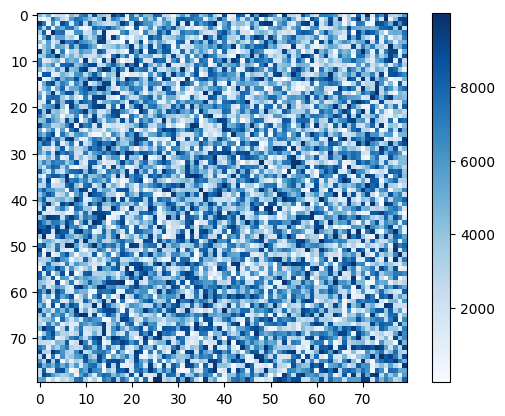

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Map = open("src/matrix.cv","r")
MapString = Map.read()

Matrix =[]

for i in MapString.split("\n"):
   Matrix.append(i.split(","))

for x in range(len(Matrix)):
   for y in range(len(Matrix[x])):
      Matrix[x][y] = int(Matrix[x][y])

Matrix= np.array(Matrix)

plt.imshow(Matrix,cmap ="Blues")
plt.colorbar()

# altering awnser 81

260324.0


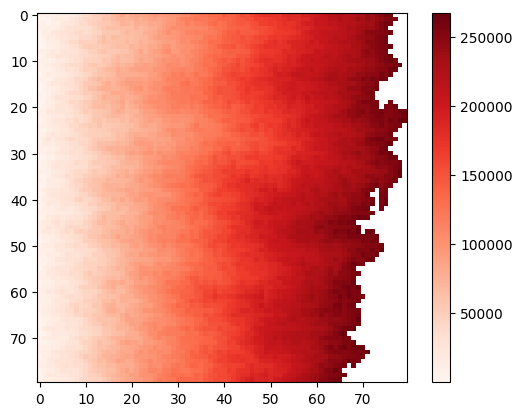

In [17]:
infinity = float('inf')
moves = [(1,0),(0,1),(-1,0)]
Start = []
for i in range(80): Start.append((i,0))
LeastPath = Matrix * infinity
for node in Start:
    LeastPath[node] = Matrix[node]
UnExplored = set()
for  node in Start: UnExplored.add(node)

def inBounds(node):
    return node[1] >=0 and node[0] >=0 and node[1] <80 and node[0] <80

while len(UnExplored) != 0:
    
    UnExploredLeastPath = infinity
    for node in UnExplored: 
        if node[1] == 79:
            UnExploredLeastNode = node
            break  
        if UnExploredLeastPath > LeastPath[node]:
             UnExploredLeastNode = node
             UnExploredLeastPath =  LeastPath[node]
        
    Position = UnExploredLeastNode
    UnExplored.remove(Position)
    
    ConnectedNodes = np.add(moves,Position)
    #now bound them, in bounds
    ConnectedNodes= filter(inBounds, ConnectedNodes)
    for node in ConnectedNodes:
        node = tuple(node)
        #prevent looping infinitley
        if LeastPath[node] == infinity:
            UnExplored.add(node)
            
        if  LeastPath[node] > LeastPath[Position] + Matrix[node]:
            LeastPath[node] = LeastPath[Position] + Matrix[node]
            
    if Position[1] == 79 :
        print(LeastPath[Position])
        break
            
plt.imshow(LeastPath,cmap ="Reds")    
plt.colorbar()       
            